In [32]:
from google.colab import files
uploaded = files.upload()

# Assuming the file name is 'cleaned_social_capital_zip.csv',
# but adjust the file name as necessary.


Saving cleaned_social_capital_zip.csv to cleaned_social_capital_zip (2).csv


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
data = pd.read_csv('cleaned_social_capital_zip.csv')

In [34]:
print(data.describe())

                zip  num_below_p50        pop2018  clustering_zip  \
count  23028.000000   23028.000000   23028.000000    23028.000000   
mean   48370.782048    1455.541979   13740.233759        0.105758   
std    27501.899531    2313.358252   15798.350163        0.020164   
min     1001.000000       0.106928       0.000000        0.059790   
25%    26756.000000     254.813646    2345.000000        0.091468   
50%    47303.500000     609.216635    6720.500000        0.103530   
75%    71355.500000    1683.381156   20694.250000        0.116750   
max    99929.000000   35835.922596  122814.000000        0.418929   

       support_ratio_zip  volunteering_rate_zip  civic_organizations_zip  \
count       23028.000000           23028.000000             23028.000000   
mean            0.907330               0.076758                 0.018970   
std             0.100791               0.036878                 0.030078   
min             0.000000               0.002049                -0.001060  

In [35]:
print(data.isnull().sum())

zip                          0
county                       0
num_below_p50                0
pop2018                      0
clustering_zip               0
support_ratio_zip            0
volunteering_rate_zip        0
civic_organizations_zip      0
ec_zip                       0
ec_se_zip                    0
nbhd_ec_zip                  0
ec_grp_mem_zip               0
ec_high_zip                  0
ec_high_se_zip               0
nbhd_ec_high_zip             0
ec_grp_mem_high_zip          0
exposure_grp_mem_zip         0
exposure_grp_mem_high_zip    0
nbhd_exposure_zip            0
bias_grp_mem_zip             0
bias_grp_mem_high_zip        0
nbhd_bias_zip                0
nbhd_bias_high_zip           0
_partind_                    0
dtype: int64


In [36]:
correlation_matrix = data.corr()
print(correlation_matrix)

                                zip  num_below_p50   pop2018  clustering_zip  \
zip                        1.000000       0.111544  0.106593       -0.146719   
num_below_p50              0.111544       1.000000  0.764666       -0.354358   
pop2018                    0.106593       0.764666  1.000000       -0.484734   
clustering_zip            -0.146719      -0.354358 -0.484734        1.000000   
support_ratio_zip         -0.093212      -0.114246 -0.206827        0.564142   
volunteering_rate_zip      0.072590      -0.309784 -0.256938        0.088858   
civic_organizations_zip   -0.020396      -0.107507 -0.128519        0.003912   
ec_zip                    -0.026919      -0.361965 -0.060924       -0.105252   
ec_se_zip                 -0.070965      -0.489970 -0.513148        0.191091   
nbhd_ec_zip               -0.004314      -0.318571  0.025348       -0.086895   
ec_grp_mem_zip            -0.021060      -0.344613 -0.021709       -0.156253   
ec_high_zip               -0.035998     

<ipython-input-36-e02734b85495>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


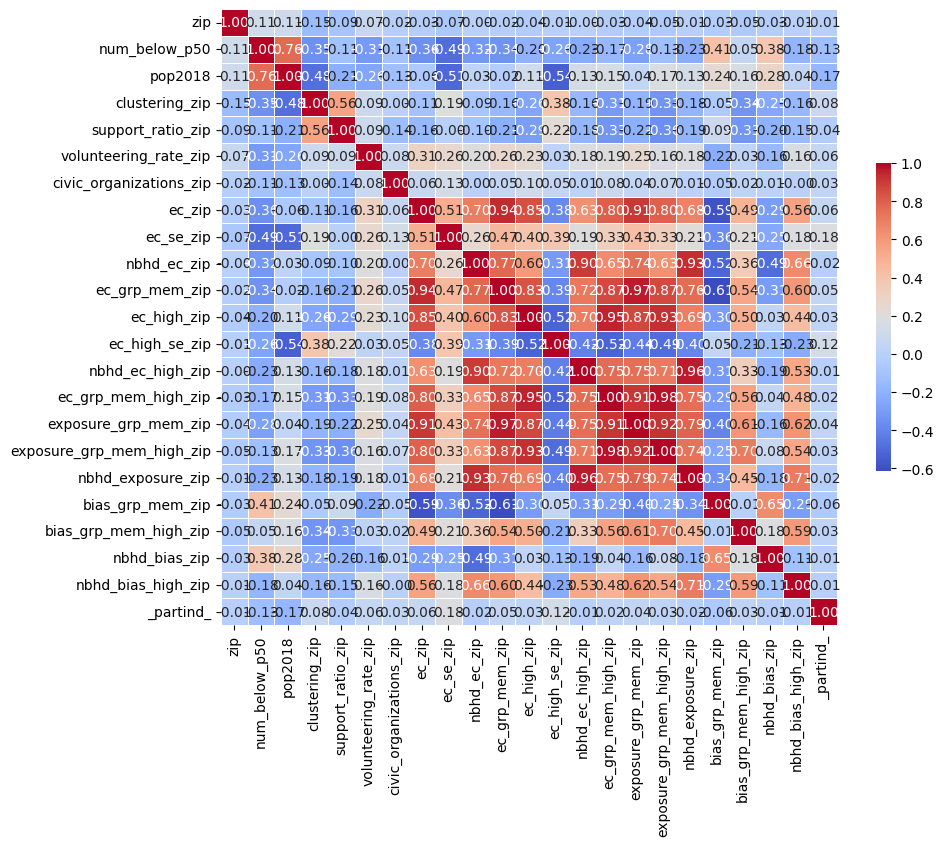

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Show plot
plt.show()

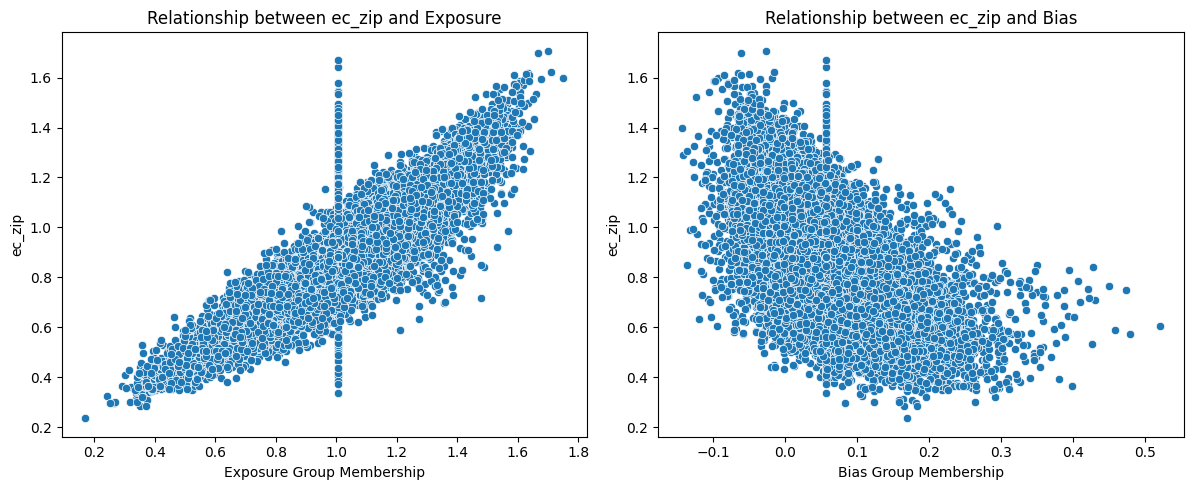

In [38]:
# Let's create visualizations for the relationships you're interested in.
# We will plot scatter plots for 'ec_zip' vs 'exposure_grp_mem_zip' and 'ec_zip' vs 'bias_grp_mem_zip',
# and if 'group_membership' is a feature, 'ec_zip' vs 'group_membership' as well.

plt.figure(figsize=(18, 5))

# 'ec_zip' vs 'exposure_grp_mem_zip'
plt.subplot(1, 3, 1)
sns.scatterplot(x=data['exposure_grp_mem_zip'], y=data['ec_zip'])
plt.title('Relationship between ec_zip and Exposure')
plt.xlabel('Exposure Group Membership')
plt.ylabel('ec_zip')

# 'ec_zip' vs 'bias_grp_mem_zip'
plt.subplot(1, 3, 2)
sns.scatterplot(x=data['bias_grp_mem_zip'], y=data['ec_zip'])
plt.title('Relationship between ec_zip and Bias')
plt.xlabel('Bias Group Membership')
plt.ylabel('ec_zip')

# Check if 'group_membership' or a similar feature exists in the dataset
# If it doesn't, this section can be commented out or adapted to another feature.
group_membership_feature = 'group_membership'  # Replace with the actual column name if different
if group_membership_feature in data.columns:
    plt.subplot(1, 3, 3)
    sns.scatterplot(x=data[group_membership_feature], y=data['ec_zip'])
    plt.title('Relationship between ec_zip and Group Membership')
    plt.xlabel('Group Membership')
    plt.ylabel('ec_zip')

# Adjust layout
plt.tight_layout()
plt.show()


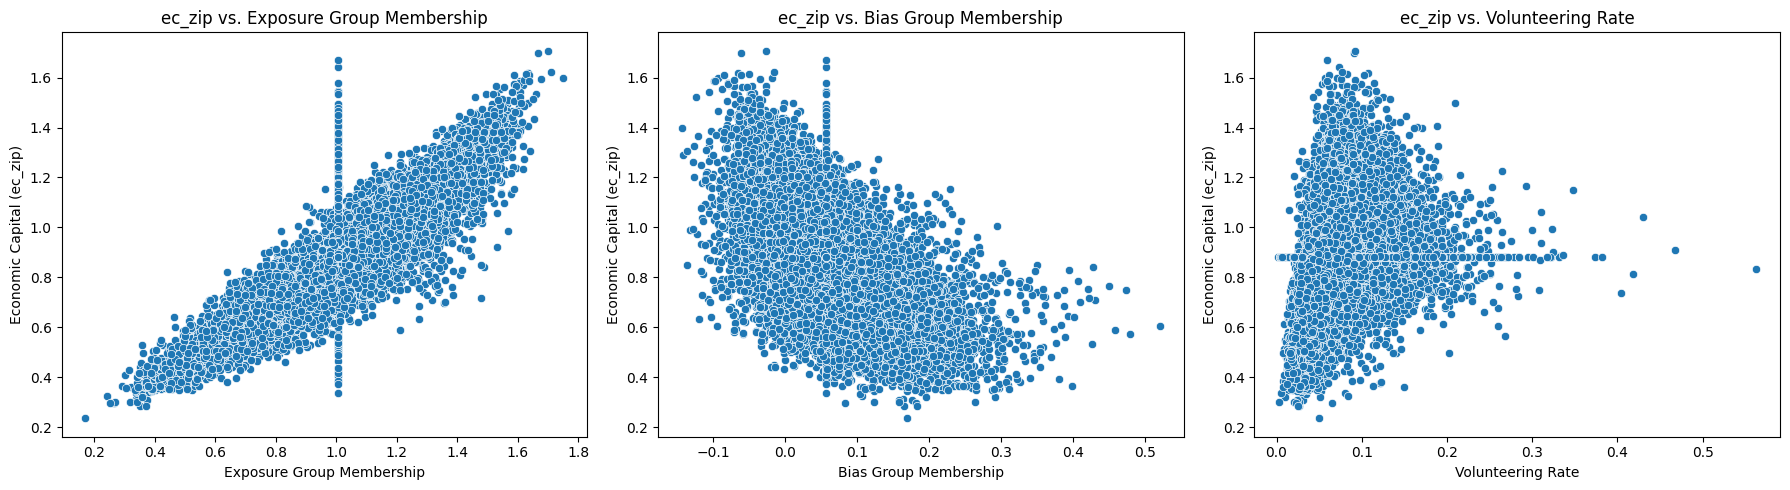

In [39]:
# Visualizing the relationship between 'ec_zip' and 'exposure_grp_mem_zip', 'bias_grp_mem_zip' through scatter plots
# and compare with another variable not directly related to exposure or bias to show their importance.

import matplotlib.pyplot as plt
import seaborn as sns

# Relationship between 'ec_zip' and 'exposure_grp_mem_zip'
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='exposure_grp_mem_zip', y='ec_zip', data=data)
plt.title('ec_zip vs. Exposure Group Membership')
plt.xlabel('Exposure Group Membership')
plt.ylabel('Economic Capital (ec_zip)')

# Relationship between 'ec_zip' and 'bias_grp_mem_zip'
plt.subplot(1, 3, 2)
sns.scatterplot(x='bias_grp_mem_zip', y='ec_zip', data=data)
plt.title('ec_zip vs. Bias Group Membership')
plt.xlabel('Bias Group Membership')
plt.ylabel('Economic Capital (ec_zip)')

# Selecting a feature not directly related to exposure or bias for comparison
# Using 'volunteering_rate_zip' as an example of a potentially less directly related variable
plt.subplot(1, 3, 3)
sns.scatterplot(x='volunteering_rate_zip', y='ec_zip', data=data)
plt.title('ec_zip vs. Volunteering Rate')
plt.xlabel('Volunteering Rate')
plt.ylabel('Economic Capital (ec_zip)')

plt.tight_layout()
plt.show()


<ipython-input-40-1b3a698a29a0>:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['exposure_grp_mem_zip'], label='Exposure Group Membership', shade=True)
<ipython-input-40-1b3a698a29a0>:32: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['bias_grp_mem_zip'], label='Bias Group Membership', shade=True)


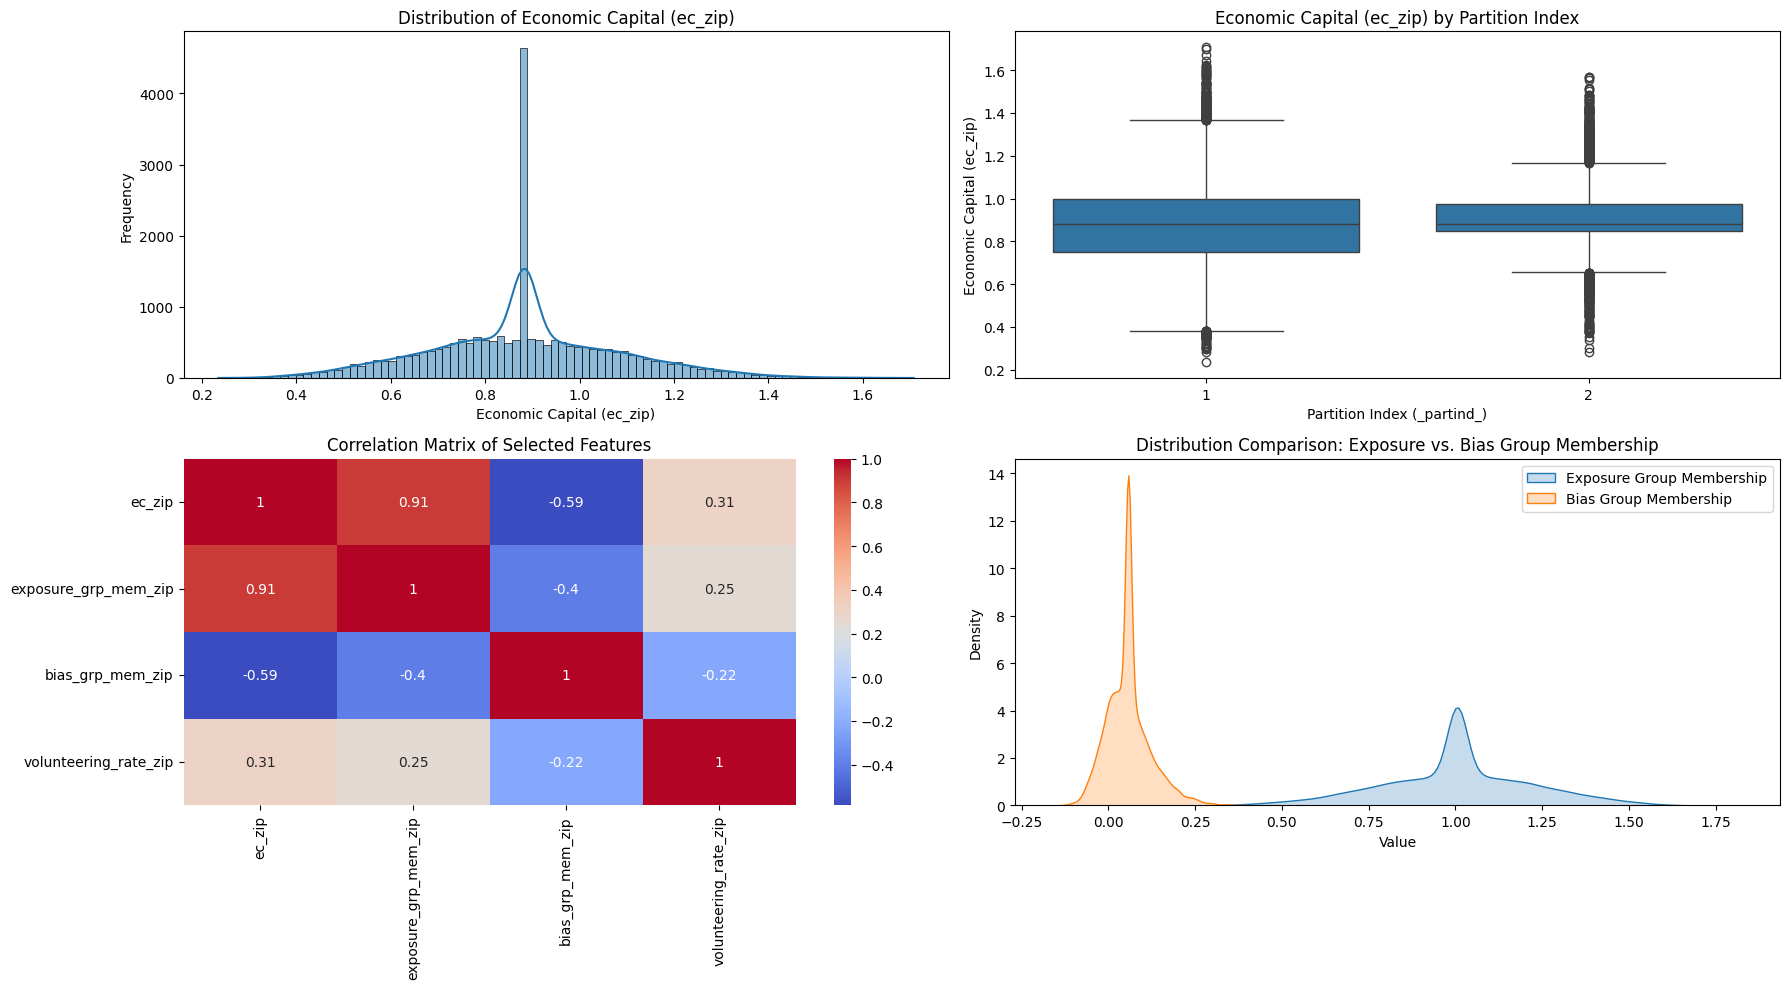

In [40]:
# Let's create additional visualizations to further explore the dataset.

plt.figure(figsize=(18, 10))

# Histogram of Economic Capital ('ec_zip')
plt.subplot(2, 2, 1)
sns.histplot(data['ec_zip'], kde=True)
plt.title('Distribution of Economic Capital (ec_zip)')
plt.xlabel('Economic Capital (ec_zip)')
plt.ylabel('Frequency')

# Boxplot of Economic Capital ('ec_zip') by partind (Partition Index)
# Assuming '_partind_' represents a categorical partition of the data for demonstration
plt.subplot(2, 2, 2)
sns.boxplot(x='_partind_', y='ec_zip', data=data)
plt.title('Economic Capital (ec_zip) by Partition Index')
plt.xlabel('Partition Index (_partind_)')
plt.ylabel('Economic Capital (ec_zip)')

# Correlation between selected features
# We'll select 'ec_zip', 'exposure_grp_mem_zip', 'bias_grp_mem_zip', and 'volunteering_rate_zip' for a correlation matrix
features_for_correlation = ['ec_zip', 'exposure_grp_mem_zip', 'bias_grp_mem_zip', 'volunteering_rate_zip']
corr = data[features_for_correlation].corr()

plt.subplot(2, 2, 3)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Selected Features')

# Distribution comparison of 'exposure_grp_mem_zip' and 'bias_grp_mem_zip'
plt.subplot(2, 2, 4)
sns.kdeplot(data['exposure_grp_mem_zip'], label='Exposure Group Membership', shade=True)
sns.kdeplot(data['bias_grp_mem_zip'], label='Bias Group Membership', shade=True)
plt.title('Distribution Comparison: Exposure vs. Bias Group Membership')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score
import numpy as np

# Preparing the dataset for model training
# Dropping non-numeric and target variable columns for X, and setting 'ec_zip' as the target variable y
X = data.drop(columns=['ec_zip', 'zip', 'county', '_partind_'])  # Assuming zip, county, and _partind_ are non-features
y = data['ec_zip']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the Decision Tree Regressor
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

# Predicting on training and test sets
y_train_pred = dt_regressor.predict(X_train)
y_test_pred = dt_regressor.predict(X_test)

# Calculating MSE and R-squared for both sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Attempting to calculate accuracy using accuracy_score() by rounding predictions to nearest integer
# This is not a standard practice for regression tasks
y_test_pred_rounded = np.round(y_test_pred)
y_test_rounded = np.round(y_test)
accuracy = accuracy_score(y_test_rounded, y_test_pred_rounded)

train_mse, test_mse, train_r2, test_r2, accuracy


(1.5591913994778097e-30,
 0.003407254003181821,
 1.0,
 0.9145030081739641,
 0.9800260529743813)

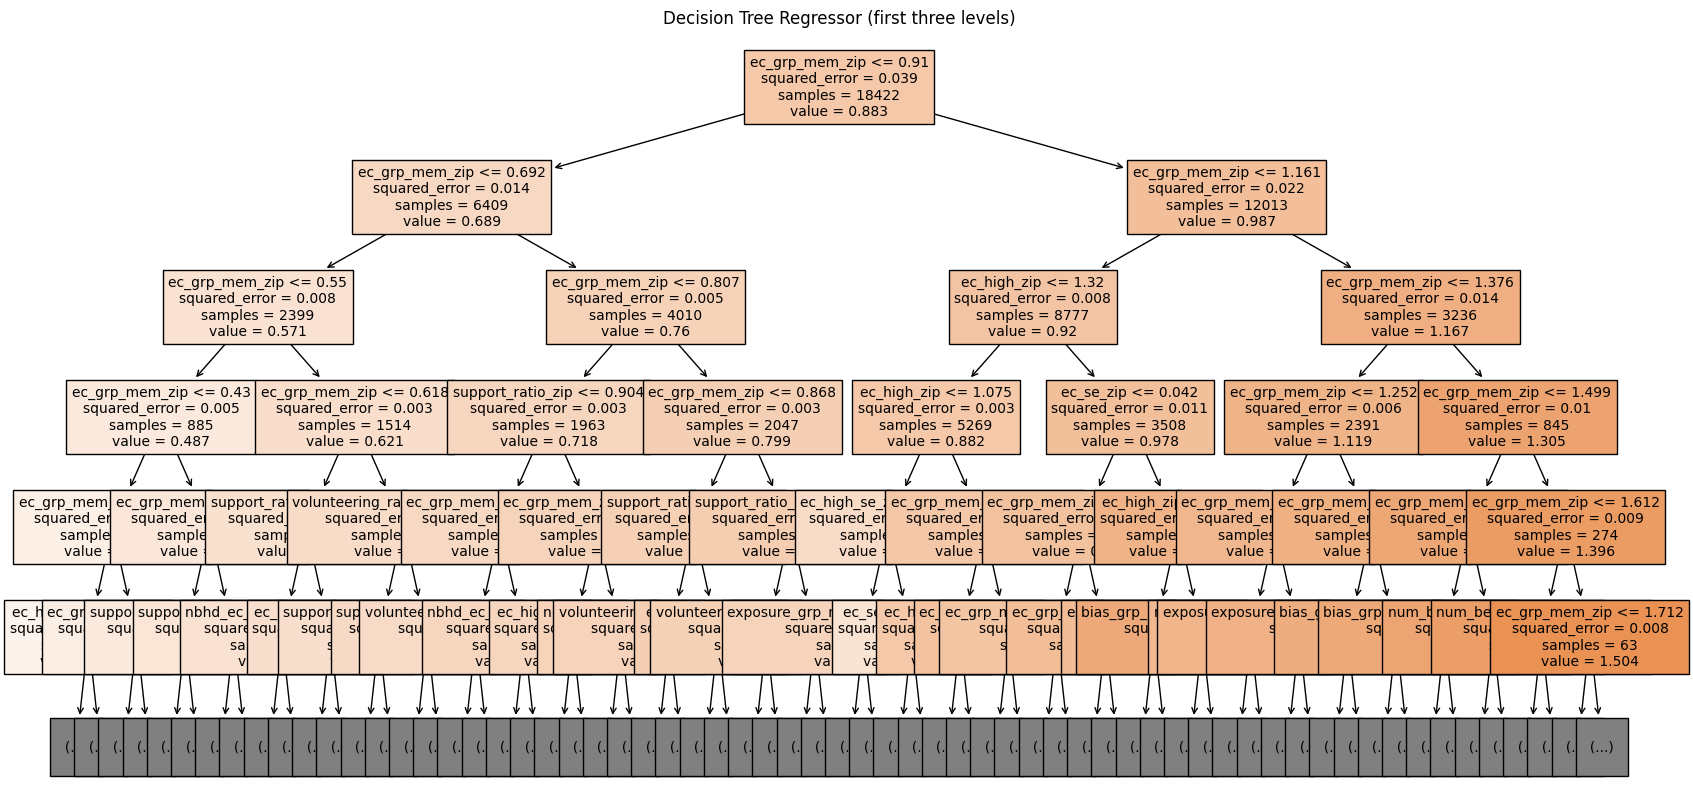

In [42]:
from sklearn.tree import plot_tree

# Displaying the decision tree
plt.figure(figsize=(20, 10))
plot_tree(dt_regressor, filled=True, feature_names=X.columns, max_depth=5, fontsize=10)
plt.title('Decision Tree Regressor (first three levels)')
plt.show()


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Decision Tree Regressor with hyperparameters aimed at reducing overfitting
dt_regressor_reduced = DecisionTreeRegressor(random_state=42, max_depth=5, min_samples_split=10, min_samples_leaf=6)

# Training the model
dt_regressor_reduced.fit(X_train, y_train)

# Predicting on training and test sets
y_train_pred_reduced = dt_regressor_reduced.predict(X_train)
y_test_pred_reduced = dt_regressor_reduced.predict(X_test)

# Calculating MSE and R-squared for both sets with the new model
train_mse_reduced = mean_squared_error(y_train, y_train_pred_reduced)
test_mse_reduced = mean_squared_error(y_test, y_test_pred_reduced)
train_r2_reduced = r2_score(y_train, y_train_pred_reduced)
test_r2_reduced = r2_score(y_test, y_test_pred_reduced)

# Results
print(f"Training MSE: {train_mse_reduced}")
print(f"Test MSE: {test_mse_reduced}")
print(f"Training R²: {train_r2_reduced}")
print(f"Test R²: {test_r2_reduced}")


Training MSE: 0.0031071555885145027
Test MSE: 0.0032382880577160908
Training R²: 0.9208075169706325
Test R²: 0.9187428095051451


<ipython-input-44-5e7a1ea928a5>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_ec_zip = data.corr().abs()['ec_zip'].sort_values(ascending=False)


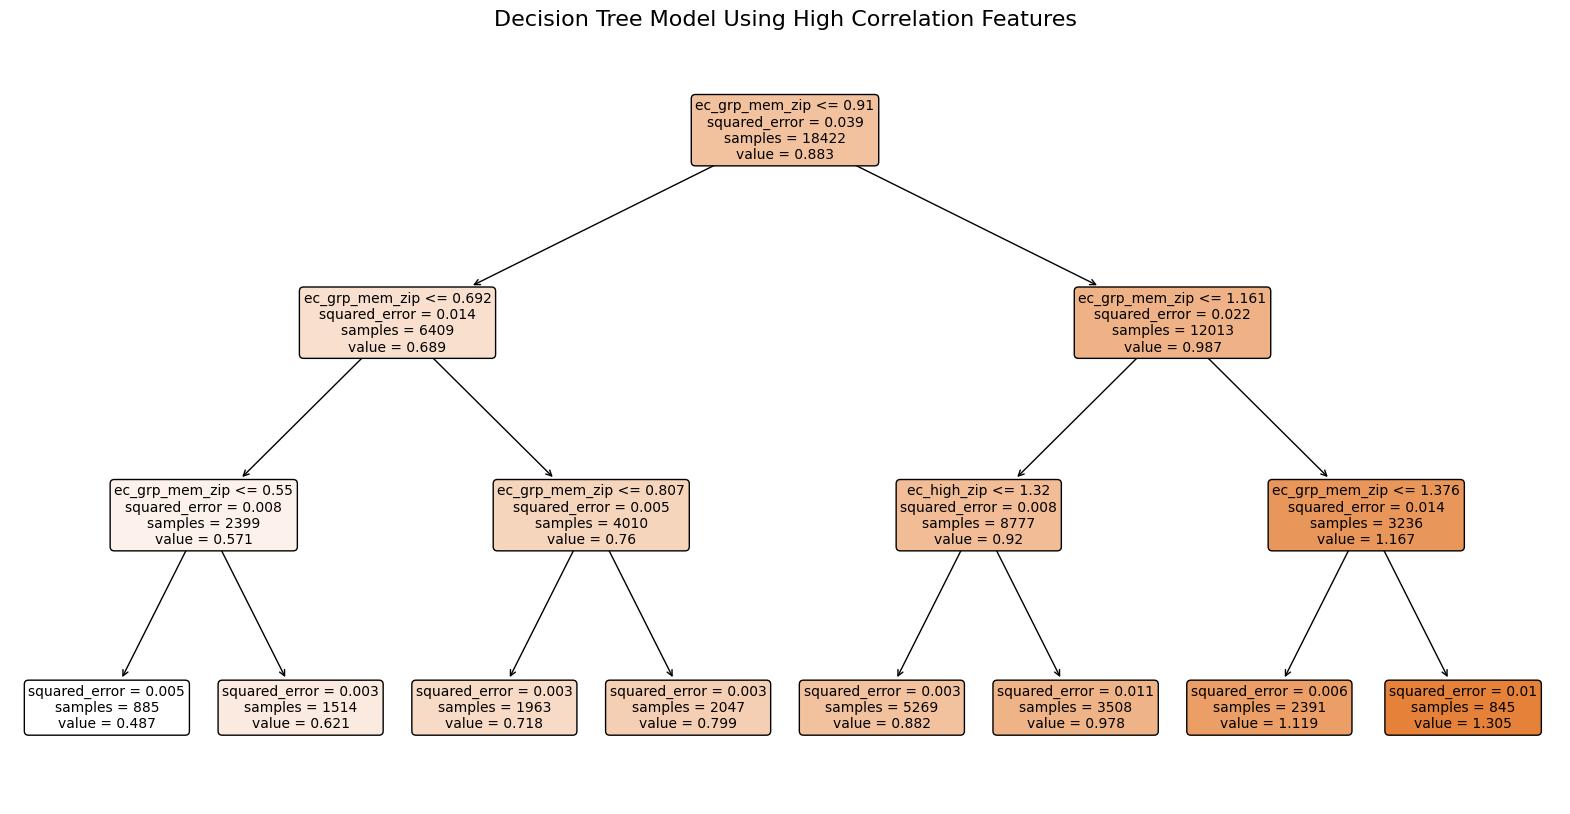

Model Accuracy (R-squared): 87.12%
Accuracy: 0.97


In [44]:
correlation_with_ec_zip = data.corr().abs()['ec_zip'].sort_values(ascending=False)

# Identify features with high correlation (excluding 'ec_zip' itself)
high_correlation_features = correlation_with_ec_zip[correlation_with_ec_zip > 0.5].drop('ec_zip').index.tolist()

# Prepare the data with high correlation features
X = data[high_correlation_features]
y = data['ec_zip']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Regressor with limited depth
dt_model = DecisionTreeRegressor(random_state=42, max_depth=3)
dt_model.fit(X_train, y_train)

# Make predictions and calculate R-squared value
y_pred = dt_model.predict(X_test)
r2_score_value = r2_score(y_test, y_pred) * 100  # Convert to percentage

# Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=high_correlation_features, filled=True, rounded=True, proportion=False, fontsize=10)
plt.title("Decision Tree Model Using High Correlation Features", fontsize=16)
plt.show()

# Print the R-squared value
print(f"Model Accuracy (R-squared): {r2_score_value:.2f}%")
from sklearn.metrics import accuracy_score

# Convert continuous predictions to categories
y_pred_class = np.round(y_pred).astype(int)
y_test_class = np.round(y_test).astype(int)

# Calculate accuracy using accuracy_score
accuracy = accuracy_score(y_test_class, y_pred_class)

print(f"Accuracy: {accuracy:.2f}")



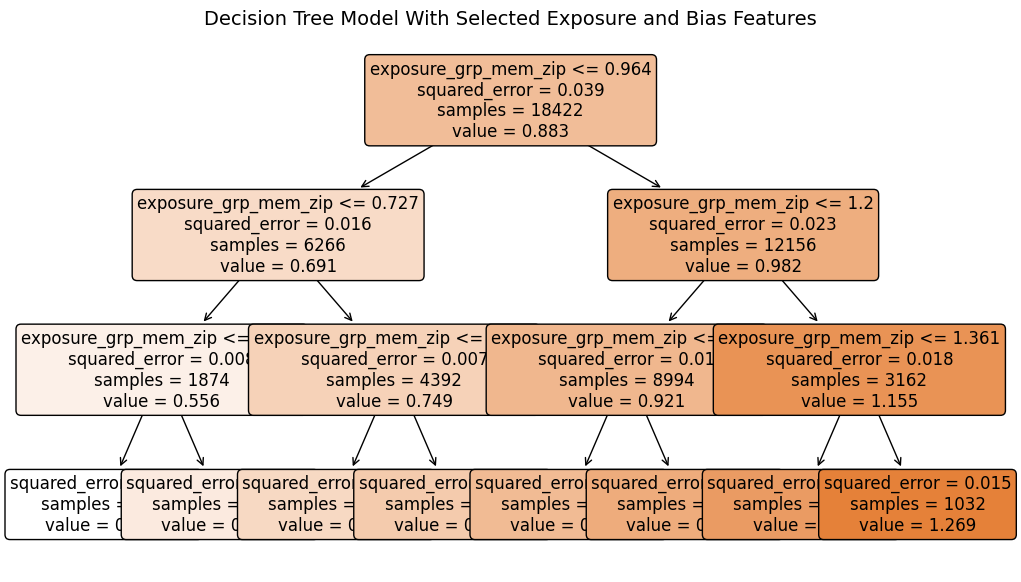

Model Accuracy (R-squared): 80.55%
Accuracy: 0.97


In [45]:
# Selecting a specific subset of "exposure" and "bias" features
selected_features = ['exposure_grp_mem_zip', 'bias_grp_mem_zip']

# Preparing the data with the selected features
X_selected = data[selected_features]
y = data['ec_zip']

# Splitting the dataset into training and testing sets
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize and train the Decision Tree Regressor with further constraints
dt_model_selected = DecisionTreeRegressor(random_state=42, max_depth=3, min_samples_leaf=5)
dt_model_selected.fit(X_train_selected, y_train)

# Visualizing the Decision Tree with selected features
plt.figure(figsize=(12, 7))
plot_tree(dt_model_selected, feature_names=selected_features, filled=True, rounded=True, proportion=False, fontsize=12)
plt.title("Decision Tree Model With Selected Exposure and Bias Features", fontsize=14)
plt.show()

# Calculating the R-squared value
y_pred_selected = dt_model_selected.predict(X_test_selected)
r2_score_selected = r2_score(y_test, y_pred_selected) * 100  # Convert to percentage

# Print the R-squared value
print(f"Model Accuracy (R-squared): {r2_score_selected:.2f}%")
from sklearn.metrics import accuracy_score

# Convert continuous predictions to categories
y_pred_class = np.round(y_pred).astype(int)
y_test_class = np.round(y_test).astype(int)

# Calculate accuracy using accuracy_score
accuracy = accuracy_score(y_test_class, y_pred_class)

print(f"Accuracy: {accuracy:.2f}")


In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset


# Selecting a specific subset of "exposure" and "bias" features
selected_features = ['exposure_grp_mem_zip', 'bias_grp_mem_zip']

# Preparing the data with the selected features
X_selected = data[selected_features]
y = data['ec_zip']

# Splitting the dataset into training and testing sets
X_train_selected, X_test_selected, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

# Initialize and train the Decision Tree Regressor with further constraints
dt_model_selected = DecisionTreeRegressor(
    random_state=42, max_depth=3, min_samples_leaf=5
)
dt_model_selected.fit(X_train_selected, y_train)

# Calculate and compare performance metrics on both training and test sets
y_train_pred = dt_model_selected.predict(X_train_selected)
y_test_pred = dt_model_selected.predict(X_test_selected)

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_mse, train_r2, test_mse, test_r2


(0.007859990913766936,
 0.7996713781085361,
 0.007750627096733502,
 0.8055163187372401)

In [48]:
# Let's first identify and handle non-numeric data
# Replace string representations of missing values with NaN and convert columns to numeric if possible
data_cleaned = data.copy()

# Attempt to convert all columns to numeric, replacing non-convertible values with NaN
for col in all_features_except_selected:
    data_cleaned[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with NaN values (which were non-numeric entries)
data_cleaned.dropna(inplace=True)

# Selecting all features except 'exposure_grp_mem_zip' and 'bias_grp_mem_zip' again
# because the columns may have changed after handling non-numeric data
all_features_except_selected = data_cleaned.columns.drop(['exposure_grp_mem_zip', 'bias_grp_mem_zip', 'ec_zip'])
X_all_except_selected = data_cleaned[all_features_except_selected]
y = data_cleaned['ec_zip']

# Splitting the cleaned dataset into training and testing sets for the new feature set
X_train_all_except, X_test_all_except, y_train, y_test = train_test_split(
    X_all_except_selected, y, test_size=0.2, random_state=42
)

# Initialize and train a new Decision Tree Regressor with the same constraints as before
dt_model_all_except = DecisionTreeRegressor(
    random_state=42, max_depth=3, min_samples_leaf=5
)

# Fit the model with the cleaned data
dt_model_all_except.fit(X_train_all_except, y_train)

# Calculate and compare performance metrics on both training and test sets for the new model
y_train_pred_all_except = dt_model_all_except.predict(X_train_all_except)
y_test_pred_all_except = dt_model_all_except.predict(X_test_all_except)

# Calculate metrics for the new model
train_mse_all_except = mean_squared_error(y_train, y_train_pred_all_except)
train_r2_all_except = r2_score(y_train, y_train_pred_all_except)
test_mse_all_except = mean_squared_error(y_test, y_test_pred_all_except)
test_r2_all_except = r2_score(y_test, y_test_pred_all_except)

# Return the new metrics and the number of rows dropped
metrics_all_except = (train_mse_all_except, train_r2_all_except, test_mse_all_except, test_r2_all_except)
rows_dropped = data.shape[0] - data_cleaned.shape[0]

metrics_all_except, rows_dropped


((0.005304883425597881,
  0.8645864666112836,
  0.0050044655711154115,
  0.8751809219813966),
 3)